In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [ ]:
#firstly we will import the data
W_data = pd.read_csv("austin_weather.csv")
W_data.head()

In [ ]:
#removing unnesserary column

data = W_data.drop([ "Events"], axis=1)
data.head()

In [ ]:
#replace the 't' and '-'
data = data.replace("T", 0.0)
data = data.replace("-", 0.0)

data.head()

In [ ]:
data.to_csv("final_data.csv")
data.head()




In [43]:
data = data.groupby("Date")
data

In [ ]:
data = pd.read_csv("final_data.csv")
data.head()

In [19]:
x= data.drop(["PrecipitationSumInches"], axis=1)

In [ ]:
y = data["PrecipitationSumInches"]

y.values.reshape(-1, 1)      #reshaping as 2d


In [ ]:
day_index = 200
days = [i for i in range(y.size)]
days

In [ ]:
#plot a graph
plt.title("the scatter graph")
plt.scatter(days,y, color = "green")
plt.xlabel("days")
plt.ylabel("y")
plt.show()

# Most values are very close to 0, This suggests that on most days, there was little to no rainfall.

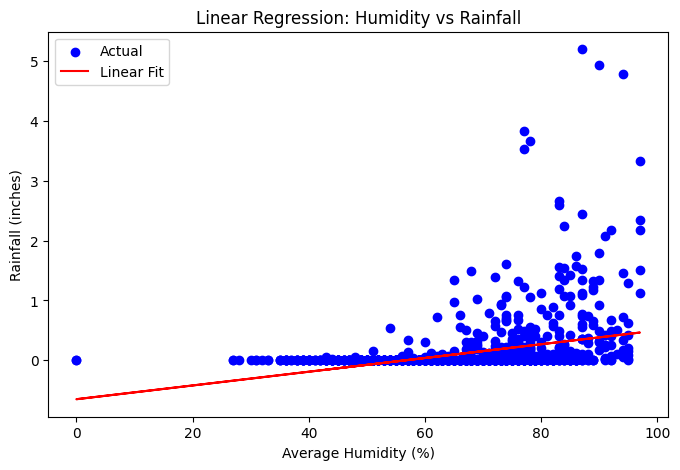

In [ ]:

# Select features (e.g., HumidityAvgPercent) and target (e.g., PrecipitationSumInches)
X = data[["HumidityAvgPercent"]]
y = data["PrecipitationSumInches"]

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, y_pred, color="red", label="Linear Fit")
plt.xlabel("Average Humidity (%)")
plt.ylabel("Rainfall (inches)")
plt.title("Linear Regression: Humidity vs Rainfall")
plt.legend()
plt.show()

# This graph shows how rainfall changes with humidity using linear regression. The red line suggests that rainfall slightly increases as humidity increases. However, most actual values (blue dots) vary widely, showing the relationship is weak.


In [3]:
df = pd.read_csv("austin_weather.csv")
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


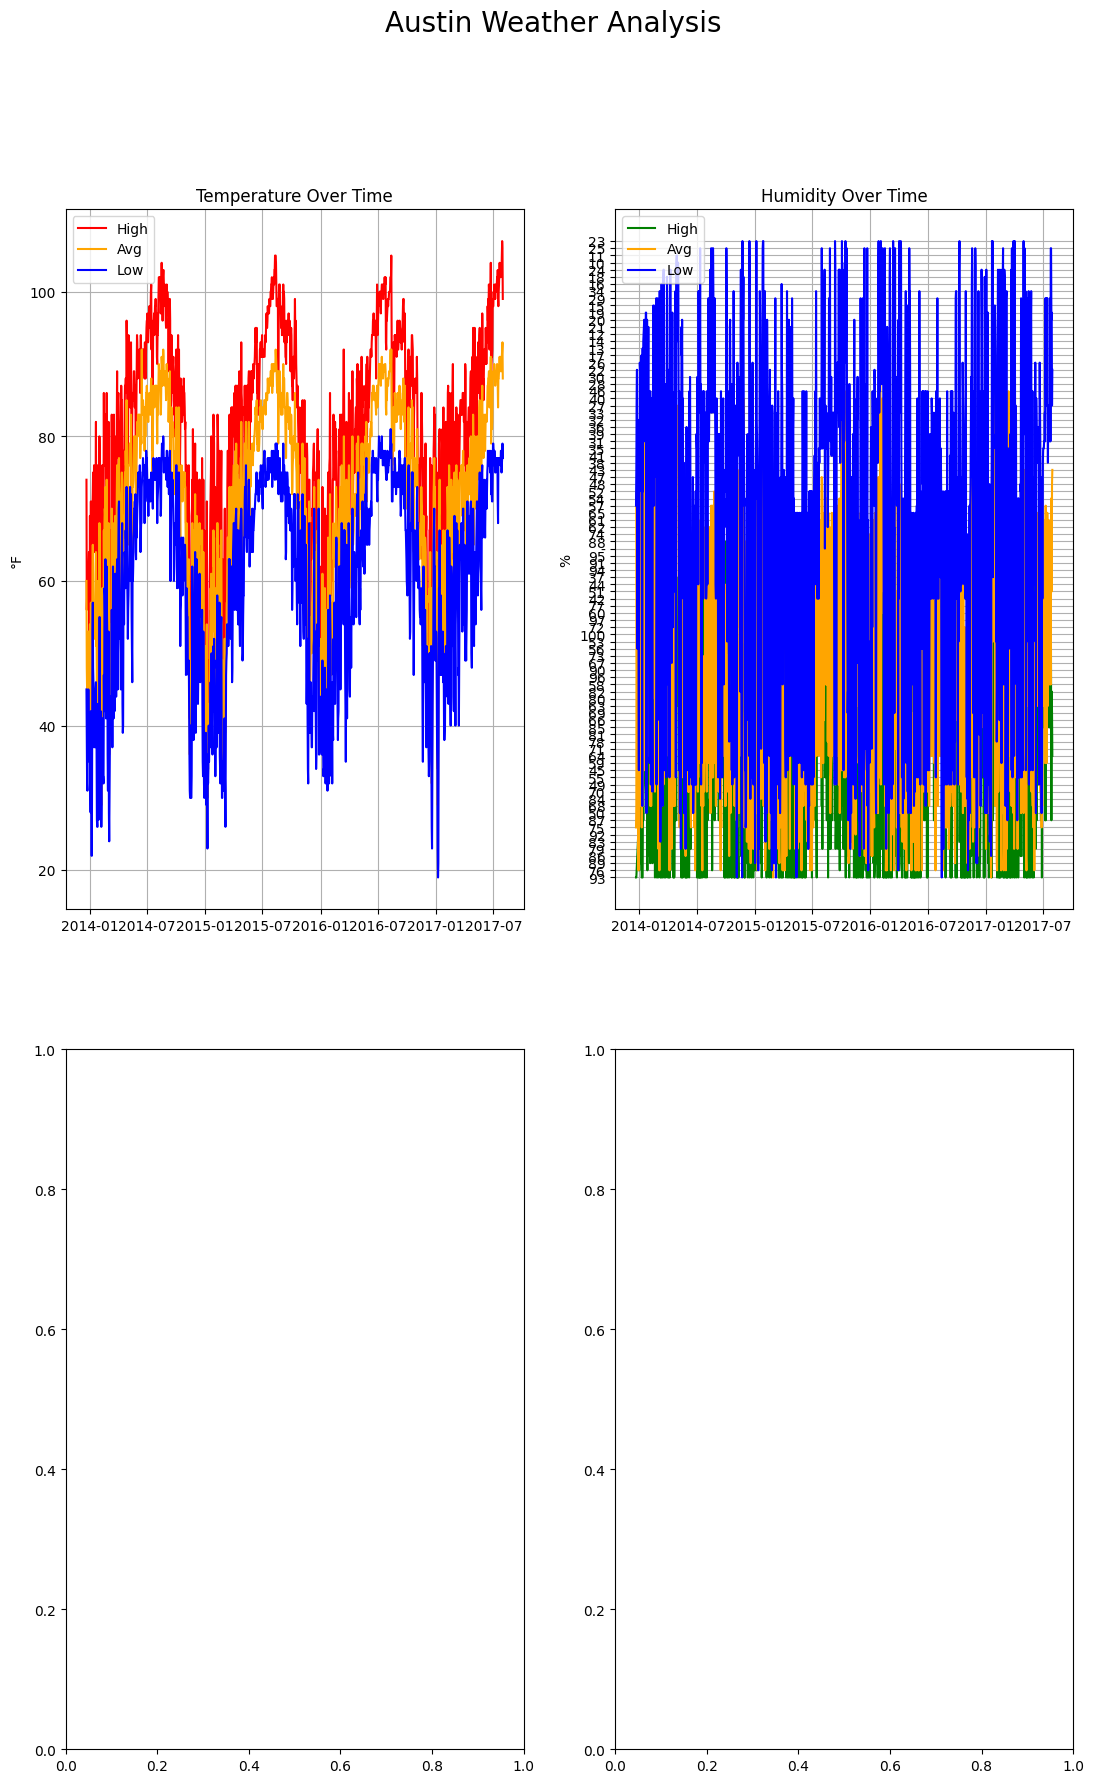

In [25]:
#applying subsets in new code-


df = pd.read_csv("austin_weather.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(13, 20))
fig.suptitle("Austin Weather Analysis", fontsize=20)

# Plot 1: Temperature (High, Avg, Low)
axs[0, 0].plot(df.index, df['TempHighF'], label='High', color='red')
axs[0, 0].plot(df.index, df['TempAvgF'], label='Avg', color='orange')
axs[0, 0].plot(df.index, df['TempLowF'], label='Low', color='blue')
axs[0, 0].set_title("Temperature Over Time")
axs[0, 0].set_ylabel("°F")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot 2: Humidity (High, Avg, Low)
axs[0, 1].plot(df.index, df['HumidityHighPercent'], label='High', color='green')
axs[0, 1].plot(df.index, df['HumidityAvgPercent'], label='Avg', color='orange')
axs[0, 1].plot(df.index, df['HumidityLowPercent'], label='Low', color='blue')
axs[0, 1].set_title("Humidity Over Time")
axs[0, 1].set_ylabel("%")
axs[0, 1].legend()
axs[0, 1].grid(True)



plt.show()
